# SC1015 Mini Project

In [2]:
# Basic Libraries 
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# 1. Cleaning the Data Set

In [3]:
df=pd.read_csv('anime.csv')
df.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14478 entries, 0 to 14477
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        14478 non-null  int64  
 1   title           14478 non-null  object 
 2   title_english   5724 non-null   object 
 3   title_japanese  14443 non-null  object 
 4   title_synonyms  8937 non-null   object 
 5   image_url       14382 non-null  object 
 6   type            14478 non-null  object 
 7   source          14478 non-null  object 
 8   episodes        14478 non-null  int64  
 9   status          14478 non-null  object 
 10  airing          14478 non-null  bool   
 11  aired_string    14478 non-null  object 
 12  aired           14478 non-null  object 
 13  duration        14478 non-null  object 
 14  rating          14478 non-null  object 
 15  score           14478 non-null  float64
 16  scored_by       14478 non-null  int64  
 17  rank            12904 non-null 

##### 1a. Dropping unwanted columns that are redundant. and Rows that contained not aired yet. 

In [5]:
### Removing unwanted columns
df = df.drop(columns = ['title_japanese','title_english','title_synonyms','image_url','background','related','opening_theme','ending_theme','aired','producer','licensor','broadcast','premiered'])

In [6]:
## Removing Rows with Status 'Not aired yet'
df = df[(df['status'] == 'Finished Airing') | (df['status'] == 'Currently Airing')]

In [7]:
## converting the duration columns to integer
def extract_minutes(duration_str):
    # Check if duration string is in expected format
    if isinstance(duration_str, str) and 'min' in duration_str:
        # Extract numeric part of duration string
        minutes_str = duration_str.split()[0]
        # Convert to integer
        minutes = int(minutes_str)
    else:
        # Return missing value if duration string is not in expected format
        minutes = None
    return minutes

# Apply the function to each value in the duration column
df['duration'] = df['duration'].apply(extract_minutes)

# Verify dtype is now int
print(df['duration'].dtype)

float64


###### 1.b Change the air_string to a integer value that returns the number of days it was aired. 

In [8]:
import re
from datetime import datetime

# Define function to extract start and end dates from aired_string column
def extract_dates(aired_str):
    # Extract start and end dates using regular expressions
    pattern = r'(\w{3}\s\d{1,2},\s\d{4})\sto\s(\w{3}\s\d{1,2},\s\d{4})'
    matches = re.findall(pattern, aired_str)
    if matches:
        start_date_str, end_date_str = matches[0]
        # Convert start and end dates to datetime objects
        start_date = datetime.strptime(start_date_str, '%b %d, %Y')
        end_date = datetime.strptime(end_date_str, '%b %d, %Y')
        # Calculate number of days between start and end dates
        days = (end_date - start_date).days
        return days
    else:
        return None

# Apply function to aired_string column
df['aired_string'] = df['aired_string'].apply(extract_dates)

In [9]:
df = df[(df['type'] == 'TV') | (df['type'] == 'Movie') | (df['type'] == 'ONA')]

In [10]:
df = df[(df['episodes'] != 0)]

In [11]:
df

,anime_id,title,type,source,episodes,status,airing,aired_string,duration,rating,score,scored_by,rank,popularity,members,favorites,studio,genre
0,11013,Inu x Boku SS,TV,Manga,12,Finished Airing,False,77.0,24.0,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,David Production,"Comedy, Supernatural, Romance, Shounen"
1,2104,Seto no Hanayome,TV,Manga,26,Finished Airing,False,182.0,24.0,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,Gonzo,"Comedy, Parody, Romance, School, Shounen"
2,5262,Shugo Chara!! Doki,TV,Manga,51,Finished Airing,False,356.0,24.0,PG - Children,7.55,37129,1508.0,1173,70127,802,Satelight,"Comedy, Magic, School, Shoujo"
3,721,Princess Tutu,TV,Original,38,Finished Airing,False,280.0,16.0,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy"
4,12365,Bakuman. 3rd Season,TV,Manga,25,Finished Airing,False,175.0,24.0,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,J.C.Staff,"Comedy, Drama, Romance, Shounen"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,37577,Hibike! Euphonium Movie: Todoketai Melody - Ph...,Movie,Unknown,3,Finished Airing,False,NaN,4.0,PG-13 - Teens 13 or older,5.66,35,10480.0,8789,809,1,Kyoto Animation,Comedy
14446,26149,Tobiuo no Boy wa Byouki Desu,Movie,Unknown,1,Finished Airing,False,NaN,19.0,G - All Ages,6.60,5,12499.0,13793,67,0,NaN,"Fantasy, Historical, Kids"
14465,27579,Mii-chan no Tenohira,Movie,Unknown,1,Finished Airing,False,NaN,20.0,G - All Ages,6.60,5,11298.0,13318,90,0,NaN,"Historical, Drama"
14466,36640,Mashiro Witch,ONA,Game,1,Finished Airing,False,NaN,2.0,PG-13 - Teens 13 or older,4.57,7,11242.0,14464,24,0,NaN,"Game, Magic"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7550 entries, 0 to 14473
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      7550 non-null   int64  
 1   title         7550 non-null   object 
 2   type          7550 non-null   object 
 3   source        7550 non-null   object 
 4   episodes      7550 non-null   int64  
 5   status        7550 non-null   object 
 6   airing        7550 non-null   bool   
 7   aired_string  4301 non-null   float64
 8   duration      7244 non-null   float64
 9   rating        7550 non-null   object 
 10  score         7550 non-null   float64
 11  scored_by     7550 non-null   int64  
 12  rank          7539 non-null   float64
 13  popularity    7550 non-null   int64  
 14  members       7550 non-null   int64  
 15  favorites     7550 non-null   int64  
 16  studio        5068 non-null   object 
 17  genre         7499 non-null   object 
dtypes: bool(1), float64(4), int

##### Changing the aired string of moveis to be 1 day. It is difficult to determine how many days the movie is on air as different countries and cinemas air it for different period of time. Hence we set the data for movies aired string to be 1. 

In [13]:
## make the data for aired string for movies to be 1 day
df['aired_string'].fillna(value='1', inplace=True)

#### 1c. Checking for Duplicates in our data, Ensure no duplicates in data set. Observe there is no duplicated rows for us to remove. Cleaning is done. 

In [14]:
duplicate = df[df.duplicated()]
print("Duplicate Rows : ")
duplicate

Duplicate Rows : 


,anime_id,title,type,source,episodes,status,airing,aired_string,duration,rating,score,scored_by,rank,popularity,members,favorites,studio,genre


# 2. Exploratory Data Analysis (EDA)
#### Data Visualization 
Break down into this few segments
1. The relationship behind the maturity rating and anime rating.
2. Anime duration vs anime rating. & how long the anime has been on the air to the rating.  
3. The number of anime titles by genre.
4. Explore studios from the dataframe. 
5. The relationship between the number of members and the anime rating.
6. The distribution of anime scores and popularity in relation to the rank.

Since we are looking at the overall effect on the rank of the anime.
A lower rank would mean that the anime is higher up on the charts and more popular. 
Hence we are looking for a negative and strong correlation if any. 

##### 2.1 Lets look at how the maturity rating affects the number of anime. 

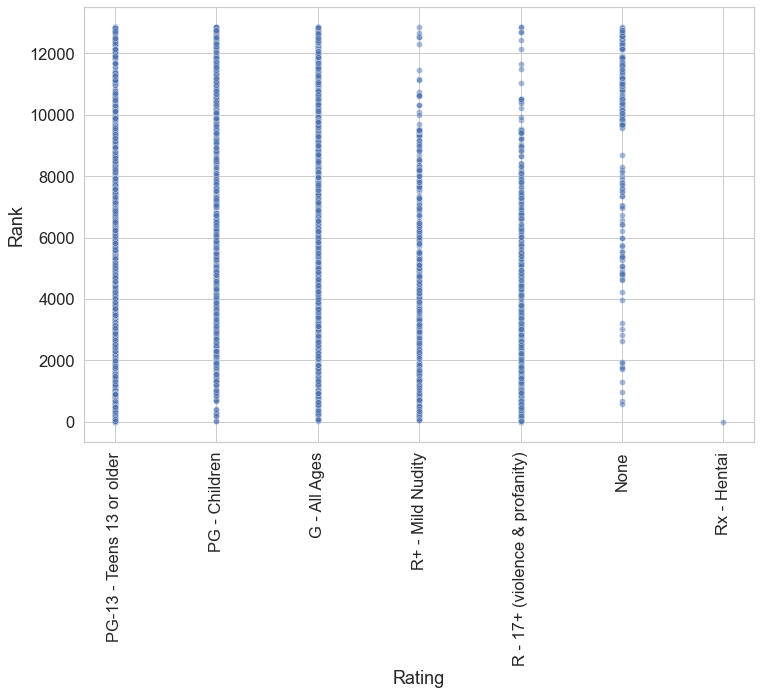

In [14]:
sb.set(style='whitegrid', font_scale=1.5)

fig, ax = plt.subplots(figsize=(12,8))

sb.scatterplot(x='rating', y='rank', data=df, alpha=0.5, ax=ax)

ax.set_xlabel('Rating')
plt.xticks(rotation=90)
ax.set_ylabel('Rank')

plt.show()

In [15]:
# Count the number of anime in each maturity rating
count_by_rating = df['rating'].value_counts()

# Print the results
print(count_by_rating)

PG-13 - Teens 13 or older         2853
G - All Ages                      2539
PG - Children                      932
R - 17+ (violence & profanity)     605
R+ - Mild Nudity                   379
None                               230
Rx - Hentai                         12
Name: rating, dtype: int64


###### Observation : 
From the plot and data set we can observe that . PG-13 has the highest number of titles released followed by G, PG, R-17, R+, None, Rx-Hentai. 

We can also see that the correlation of matruity with rank is not strongly related. However we can tell that the Maturity Rating of lower than R+ has more titles that has rank 10,000 or more. Since the lower the rank the better the anime. We can tell that if an anime is of the Rating R+ and above it will highly likey be rated lower than 10,000.

#### 2.2 Relationship of Anime Duration Vs Rank of the anime

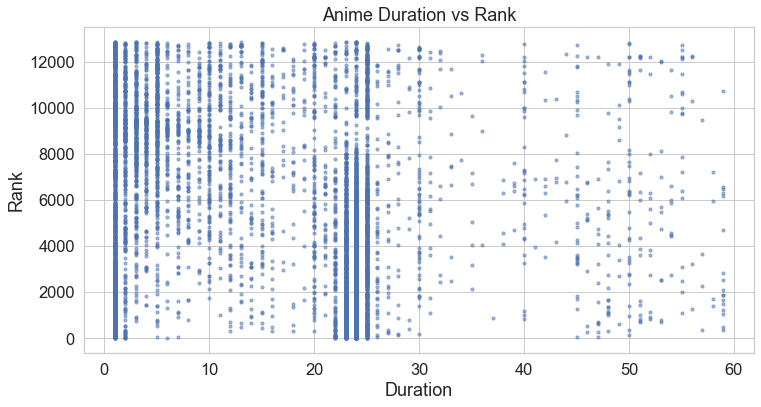

In [16]:
## lets look at how the anime duration affects the rank.
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df['duration'], df['rank'], s=10, alpha=0.5)

ax.set_xlabel('Duration')
ax.set_ylabel('Rank')
ax.set_title('Anime Duration vs Rank')

plt.show()

In [17]:
top_5_durations = df['duration'].value_counts().head()
print('Episode duration (mins) | Number of titles')
print('---- | ----')
print(top_5_durations)

Episode duration (mins) | Number of titles
---- | ----
24.0    1427
1.0     1304
25.0     755
23.0     739
5.0      326
Name: duration, dtype: int64


##### Observation : 
From the scatter plot of duration against rank, we can see that there is a weak negative correlation between the two variables. This means that as the duration of the anime increases, the rank tends to decrease slightly. However, the correlation is weak, which means that duration is not a very strong predictor of rank.

We can also observe that there are some outliers with very high duration and high rank, suggesting that there are some anime with long durations that are still very popular and highly ranked.

The most popular episode duration with the largest number of title is 24 mins with 1427 titles, 1 min for 1304 titles and 25mins at 755 titles.

The 24 mins and 25 mins are understandable as the standard episode length in Japan is aorund 24-25 mins when the anime is aired on national TV. The 1 min epsiode length is most likely due to Original Video Animation (OVA) a short video released especially for the relaese in home video formats that is common in japan.

##### Lets look at how the air string is in relation to the Anime Rank

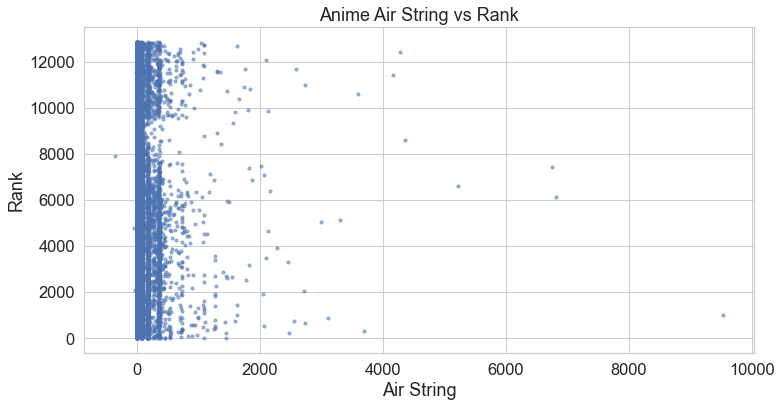

In [18]:
# create a scatter plot of air string vs rank
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df['aired_string'], df['rank'], s=10, alpha=0.5)

ax.set_xlabel('Air String')
ax.set_ylabel('Rank')
ax.set_title('Anime Air String vs Rank')

plt.show()

##### Lets look at the Top 20 Ranked Anime and their corresponding number of days aired. 

In [39]:
df_lowest_rank = df.nsmallest(20, 'rank')[['title', 'aired_string', 'rank']]
df_lowest_rank = df_lowest_rank[df_lowest_rank['rank'] != 0] # Remove rank 0
df_lowest_rank['title'] = df_lowest_rank['title'].str.ljust(70) # Left align the text
print(df_lowest_rank.to_string(index=False, justify='left'))

title                                                                   aired_string  rank
 Fullmetal Alchemist: Brotherhood                                         455          1.0
 Kimi no Na wa.                                                             1          2.0
 Gintama°                                                                 357          3.0
 Steins;Gate 0                                                              1          4.0
 Steins;Gate                                                              161          5.0
 Gintama&#039;                                                            357          7.0
 Hunter x Hunter (2011)                                                  1088          8.0
 3-gatsu no Lion 2nd Season                                               168          9.0
 Gintama&#039;: Enchousen                                                 175         10.0
 Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare                      1         11.0

###### Observation : 
The Top 20 Anime show that there is not really any strong correlation between the Rank of the anime and the number of days it was up on air. It might not be wise to predict the rank from the number of days it would be on the air. 

Anime with 1 Episodes are very likley to be movies. Kimi no Na wa ranked 2nd place was a hit movie in Japan and intenationally and many of the that are movie titles have a 1 day aired string. 

Althought there is no strong correlation. If we exclude the titles that are 1 episode in the top 20 rank list as they are movies, we can see that most of the other top ranked anime have been running for a long amount of time. It can be reasoned that an anime with a higher rank that is more well recieved by the audience would be up on the air longer. 

#### 2.3 Relationship of anime title vs genres

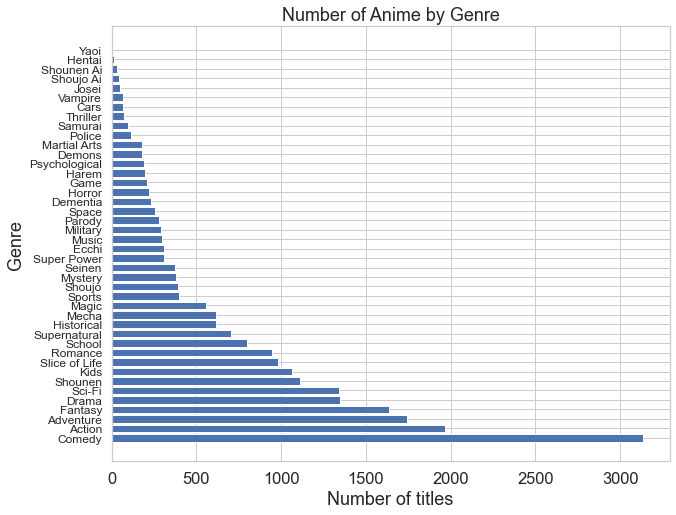

In [20]:
genre_count = {}
for genres in df['genre']:
    if pd.isnull(genres):
        continue
    for genre in genres.split(','):
        if genre.strip() in genre_count:
            genre_count[genre.strip()] += 1
        else:
            genre_count[genre.strip()] = 1

# Sort the genres by their count in descending order
sorted_genre_count = {k: v for k, v in sorted(genre_count.items(), key=lambda item: item[1], reverse=True)}

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(list(sorted_genre_count.keys()), list(sorted_genre_count.values()))
ax.set_xlabel('Number of titles')
ax.set_ylabel('Genre')
ax.set_title('Number of Anime by Genre')
ax.tick_params(axis='y', labelsize=12)
plt.show()

###### Obesrvation: 
From the bar graph, we can see the distribution of the number of anime titles by genre. 

We can observe that the "Comedy" and "Action" genres have the highest number of titles, followed by "Romance," "Fantasy," "Adventure," and "Drama." We can also see that some genres have very few titles. Which can be reasoned that the target audience for these genres are not as large as those such as comedy and action. 

##### 2.4 Relationship beteween studios. 

In [21]:
studio_counts = df['studio'].value_counts()
print(studio_counts)
## This returns the number of anime titles produced by the particular studio. Toei Animation is First with 508 anime titles produced. 

Toei Animation                                    508
Sunrise                                           243
Madhouse                                          186
Studio Deen                                       162
TMS Entertainment                                 150
                                                 ... 
PRA                                                 1
Plus Heads                                          1
Nippon Animation, Shaft                             1
Ajia-Do, TMS Entertainment                          1
Asahi Production, Shochiku Animation Institute      1
Name: studio, Length: 593, dtype: int64


In [22]:
# Group the data by studio and calculate the mean rank
mean_rank_by_studio = df.groupby('studio')['rank'].mean().round(1)

# Sort the studios by mean rank in ascending order and select the top 20 with the lowest mean rank
top_studios_low_rank = mean_rank_by_studio.sort_values().head(20)

# Print the result
print(top_studios_low_rank)

studio
Madhouse, MAPPA                           55.0
J.C.Staff, Egg Firm                       65.5
Studio Chizu                              68.0
Tezuka Productions, MAPPA                145.0
Brain&#039;s Base, Marvy Jack            151.0
Studio Gallop, Studio Deen               168.0
Studio Ghibli, Studio Hibari             185.0
Imagin                                   204.0
Gainax, Tatsunoko Production             223.0
Production I.G, Madhouse                 232.5
Studio Gallop, Studio Comet              256.0
Shuka                                    331.3
A-1 Pictures, Trigger, CloverWorks       342.0
Studio Rikka, Purple Cow Studio Japan    352.0
NUT                                      391.0
A-1 Pictures, Bridge                     397.0
Shirogumi, Shin-Ei Animation             406.0
Hoods Drifters Studio                    486.0
Artland, Tatsunoko Production            501.5
Artland, Madhouse                        517.0
Name: rank, dtype: float64


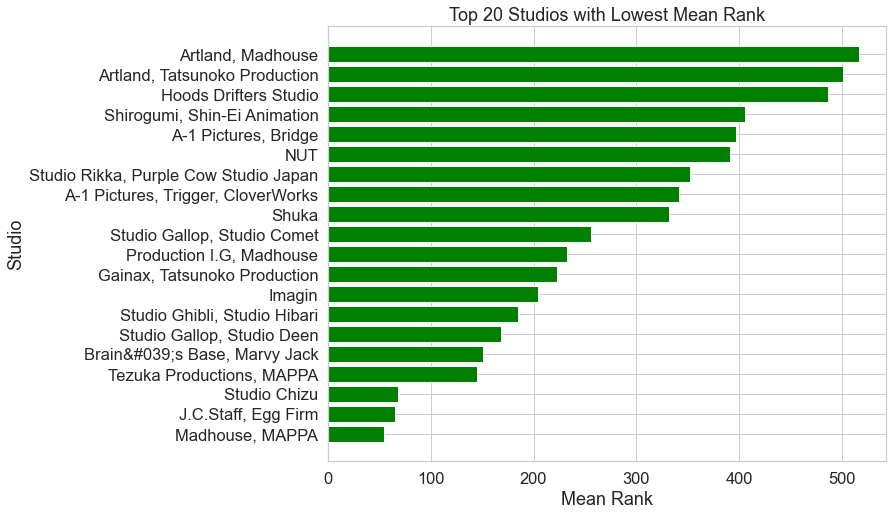

In [23]:
import matplotlib.pyplot as plt

# calculate the mean rank for each studio
studio_ranks = df.groupby('studio')['rank'].mean()

# sort the studios by mean rank in ascending order and take the top 20
lowest_rank_studios = studio_ranks.sort_values().head(20)

# create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(lowest_rank_studios.index, lowest_rank_studios.values, color='green')
ax.set_xlabel('Mean Rank')
ax.set_ylabel('Studio')
ax.set_title('Top 20 Studios with Lowest Mean Rank')
plt.show()


###### Observation 
Since a lower Ranking would mean that anime title is more popular and higher up in the charts. We took the top 20 studios and average out the rank of the anime that they have produced to give an idea of the work that each studio does. 

We can make some very interesing obersvation here. The Top Studio Madhouse, MAPPA is in the lead with an average Rank of 55.0 Rank. MAPPA is famous for producing top class animation such as Attack On Titan, Jujutsu Kaisen, Chainsaw Man and many other highly rated anime. Other popular studios that make Hits are seen in this top 20 ranking such as Studio Ghibli. We can infer that a anime produced by this studio would likely result in an anime of a lower mean Rank and hence more successfull anime.

##### 2.5 Relationship between the number of members and the effect on the rank

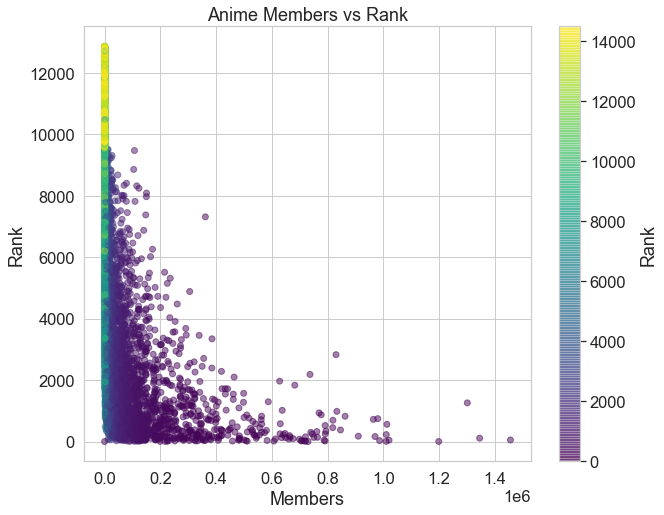

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

# Define the x and y variables
x = df['members']
y = df['rank']
colors = df['popularity']

# Create the scatter plot
scatter = ax.scatter(x, y, c=colors, cmap='viridis', alpha=0.5)

# Set the labels and title
ax.set_xlabel('Members')
ax.set_ylabel('Rank')
ax.set_title('Anime Members vs Rank') 

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Rank')

plt.show()

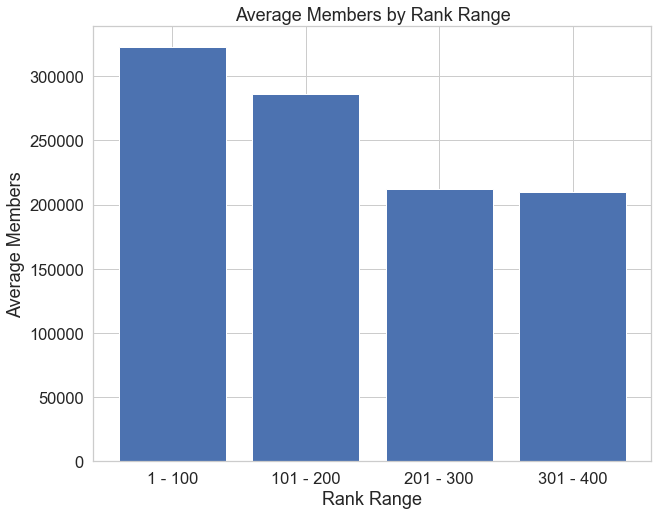

In [43]:
# Define the rank ranges
rank_ranges = [(1, 100), (101, 200), (201, 300), (301, 400)]

# Create a new DataFrame to store the results
df_avg_members = pd.DataFrame(columns=['Rank Range', 'Average Members'])

# Calculate the average members for each rank range
for rank_range in rank_ranges:
    lower_rank, upper_rank = rank_range
    avg_members = df[(df['rank'] >= lower_rank) & (df['rank'] <= upper_rank)]['members'].mean()
    df_avg_members = df_avg_members.append({'Rank Range': f'{lower_rank} - {upper_rank}', 'Average Members': avg_members}, ignore_index=True)

# Create a bar plot to show the average members for each rank range
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(df_avg_members['Rank Range'], df_avg_members['Average Members'])
ax.set_xlabel('Rank Range')
ax.set_ylabel('Average Members')
ax.set_title('Average Members by Rank Range')
plt.show()


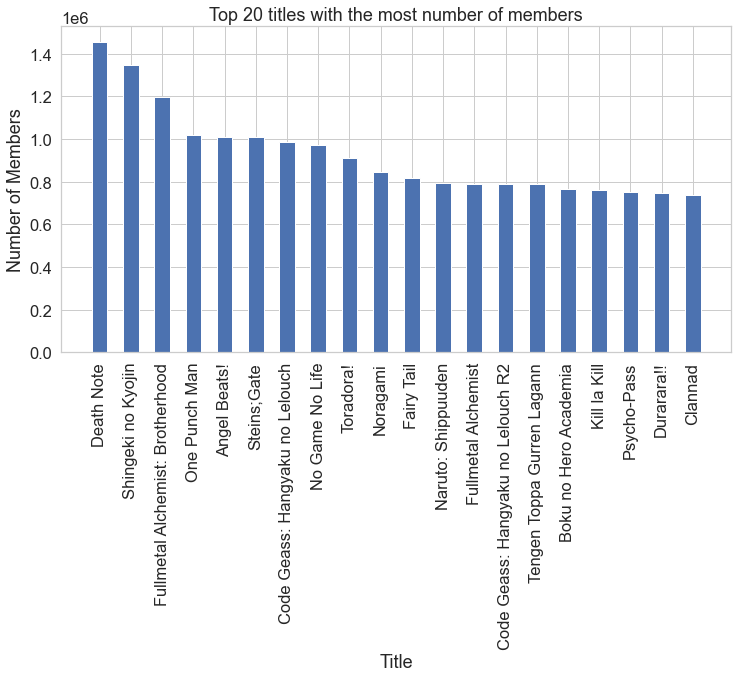

In [49]:
# Get data for top 500 ranked anime
df_top_500 = df[df['rank'] <= 500]

# Sort data by number of members
df_top_500_sorted = df_top_500.sort_values(by=['members'], ascending=False)

# Get the titles and members data
titles = df_top_500_sorted['title'][:20]
members = df_top_500_sorted['members'][:20]

# Create the bar graph
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(titles, members, width=0.5)

# Set the labels and title
ax.set_xlabel('Title')
ax.set_ylabel('Number of Members')
ax.set_title('Top 20 titles with the most number of members')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the graph
plt.show()


In [57]:
df_top_20_members = df.nlargest(20, 'members')[['title', 'members', 'rank']]
df_top_20_members = df_top_20_members[df_top_20_members['rank'] != 0] # Remove rank 0
df_top_20_members['title'] = df_top_20_members['title'].str.ljust(70) # Left align the text
print(df_top_20_members.to_string(index=False, justify='left'))

title                                                                    members  rank  
 Death Note                                                              1456378    51.0
 Shingeki no Kyojin                                                      1345842   110.0
 Sword Art Online                                                        1301616  1259.0
 Fullmetal Alchemist: Brotherhood                                        1199091     1.0
 One Punch Man                                                           1020754    44.0
 Tokyo Ghoul                                                             1013138   560.0
 Angel Beats!                                                            1010771   227.0
 Steins;Gate                                                             1010330     5.0
 Code Geass: Hangyaku no Lelouch                                          986897    30.0
 Naruto                                                                   980265   745.0
 No Game No Life     

<ipython-input-53-de270bdbfe9d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_top_20['title'], rotation=90)


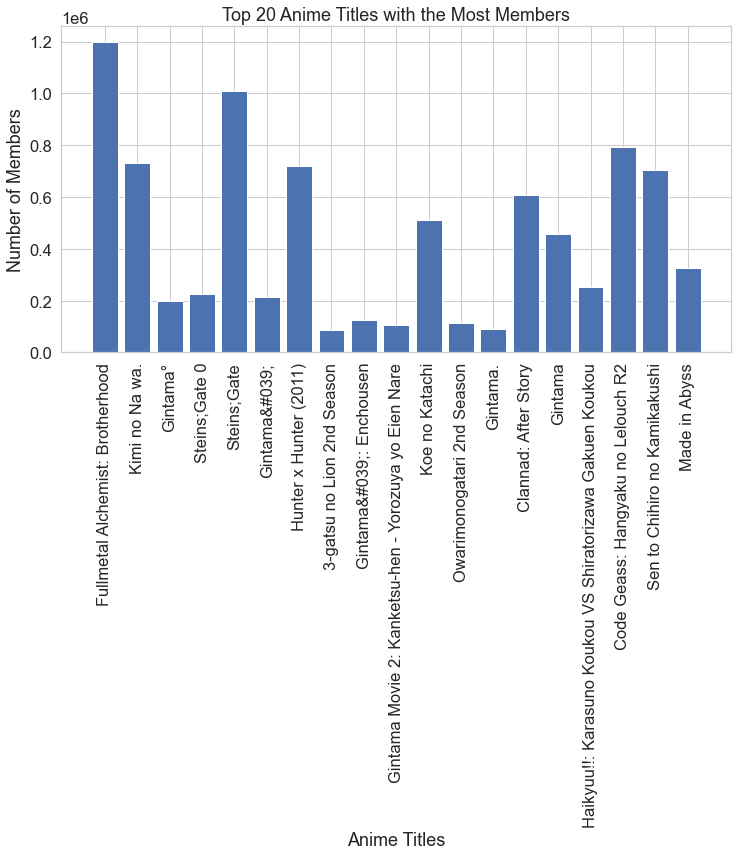

In [53]:
import matplotlib.pyplot as plt

df_top_20 = df.nsmallest(20, 'rank')[['title', 'members', 'rank']]
df_top_20 = df_top_20[df_top_20['rank'] != 0] # Remove rank 0

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(df_top_20['title'], df_top_20['members'])

ax.set_xticklabels(df_top_20['title'], rotation=90)
ax.set_xlabel('Anime Titles')
ax.set_ylabel('Number of Members')
ax.set_title('Top 20 Anime Titles with the Most Members')

plt.show()

In [63]:
df_lowest_rank = df.nsmallest(20, 'rank')[['title', 'members', 'rank']]
df_lowest_rank = df_lowest_rank[df_lowest_rank['rank'] != 0] # Remove rank 0
df_lowest_rank['title'] = df_lowest_rank['title'].str.ljust(70) # Left align the text
print(df_lowest_rank.to_string(index=False, justify='left'))

title                                                                    members  rank
 Fullmetal Alchemist: Brotherhood                                        1199091   1.0
 Kimi no Na wa.                                                           730076   2.0
 Gintama°                                                                 198744   3.0
 Steins;Gate 0                                                            223989   4.0
 Steins;Gate                                                             1010330   5.0
 Gintama&#039;                                                            215527   7.0
 Hunter x Hunter (2011)                                                   720920   8.0
 3-gatsu no Lion 2nd Season                                                85744   9.0
 Gintama&#039;: Enchousen                                                 123572  10.0
 Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare                    105458  11.0
 Koe no Katachi                            

##### Observation
We can see from the scatter plot that the scatter plot anime title with a larger number of members are ranked lower in the graph. 

From the second bar graph, we can see the average number of member for the rank range of 100. We can observe that the avergae numbers of members decrease as the rank increases. Hence there is a correlation between the average number of members to the rank of an anime. It can be reasoned that a larger number of members following the anime would have a lower rank and more popular anime. 

The third graph shows the 20 anime title with the largest number of members and the fourth graph shows the top 20 ranked anime and thier corresponding members. We can tell that most  

##### 2.6 The distribution of anime scores and popularity and the effect on the rank.

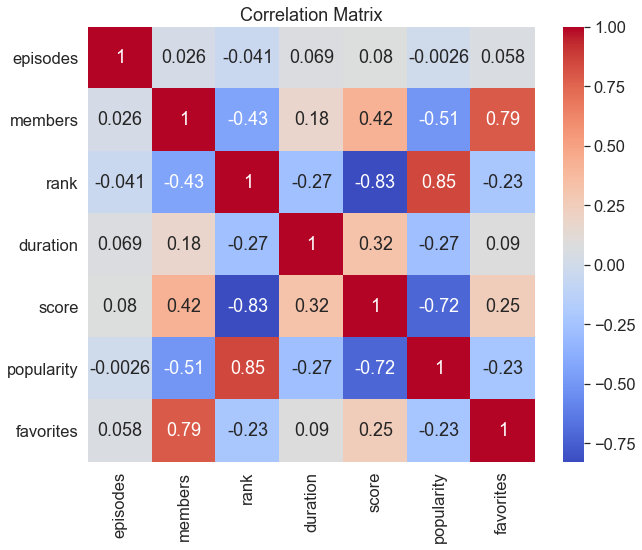

In [24]:
# Select only the numerical columns
num_cols = ['episodes', 'rating', 'members', 'rank','aired_string','duration','score','popularity','favorites']

# Create a correlation matrix
corr_matrix = df[num_cols].corr()

# Create a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix')
plt.show()

##### Observation : 
Lets narrow it down to the poularity and score in relation to the rank of an anime. 

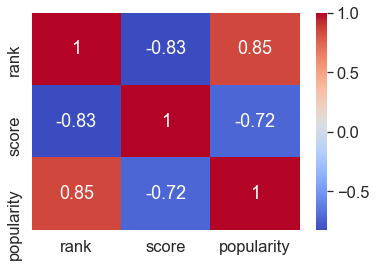

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns we want to plot
df_heatmap = df[['rank', 'score', 'popularity']]

# Compute the correlation matrix
corr = df_heatmap.corr()

# Plot the heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Show the plot
plt.show()

##### Observation : 

Since a lower rank would imply a more popular anime, the negative correaltion between score of rank is -0.83 is justified. A strong negative correlation would mean that as the score of the anime increase the rank decrease. Placing it higher on the charts. 

Other potential factors to look out for would be popularity at 0.85 and members at -0.43 and  duration at -0.27. A correlation of -0.27 between duration and rank suggests that there is a weak negative relationship between the two variables. In other words, as the duration of an anime increases, the rank tends to decrease slightly, but the relationship is not particularly strong. It is important to keep in mind that correlation does not imply causation, and other factors may be influencing both the duration and rank of an anime.

===============================
### Summary
The factors affecting rank the most are score and popularity.
Maturity rating wise: more anime of lower rating are produced.
Anime duration is roughly between 23-25 minutes, with OVAs around 1 minute each.
Most anime produced belong to the comedy, action, or adventure genres.
Some studios produce a lower mean rating compared to others. If an anime is produced by these studios, it is likely that the rank will be lower.

# 3. Classification
This section attempts to answer the question of whether it is worth watching an anime or not.
A few factors would go into finding said answer. For instance, it is likely that it is worth watching some anime if it is very popular, or if it has a very high rating.
We will use these variables to create a new column with name, `worth`. If it is worth watching, then the variable will carry `1`, otherwise, it will carry `0`.
Then, we will use some predictors to predict `worth`, like `episodes`, or `favourites`.

We now start off simple by predicting with a Decision Tree Classifier model.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7550 entries, 0 to 14473
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      7550 non-null   int64  
 1   title         7550 non-null   object 
 2   type          7550 non-null   object 
 3   source        7550 non-null   object 
 4   episodes      7550 non-null   int64  
 5   status        7550 non-null   object 
 6   airing        7550 non-null   bool   
 7   aired_string  7550 non-null   object 
 8   duration      7244 non-null   float64
 9   rating        7550 non-null   object 
 10  score         7550 non-null   float64
 11  scored_by     7550 non-null   int64  
 12  rank          7539 non-null   float64
 13  popularity    7550 non-null   int64  
 14  members       7550 non-null   int64  
 15  favorites     7550 non-null   int64  
 16  studio        5068 non-null   object 
 17  genre         7499 non-null   object 
dtypes: bool(1), float64(3), int

In [16]:
# Create 'worth' column, attributes: top 300 in ranking, and top 300 in
# popularity
conditions = [(df['rank'] <= 300) | (df['popularity'] <= 300),
             (df['rank'] > 300) | (df['popularity'] > 300)]
values = [1, 0]
df['worth'] = np.select(conditions, values)
df.head()

,anime_id,title,type,source,episodes,status,airing,aired_string,duration,rating,score,scored_by,rank,popularity,members,favorites,studio,genre,worth
0,11013,Inu x Boku SS,TV,Manga,12,Finished Airing,False,77.0,24.0,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,David Production,"Comedy, Supernatural, Romance, Shounen",1
1,2104,Seto no Hanayome,TV,Manga,26,Finished Airing,False,182.0,24.0,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,Gonzo,"Comedy, Parody, Romance, School, Shounen",0
2,5262,Shugo Chara!! Doki,TV,Manga,51,Finished Airing,False,356.0,24.0,PG - Children,7.55,37129,1508.0,1173,70127,802,Satelight,"Comedy, Magic, School, Shoujo",0
3,721,Princess Tutu,TV,Original,38,Finished Airing,False,280.0,16.0,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy",0
4,12365,Bakuman. 3rd Season,TV,Manga,25,Finished Airing,False,175.0,24.0,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,J.C.Staff,"Comedy, Drama, Romance, Shounen",1


In [17]:
# Number of worthy animes vs number of not worthy animes
lenworth = len(df[df["worth"] == 1])
lennotworth = len(df[df["worth"] == 0])
print("Number of worthy animes: \t", lenworth)
print("Number of not worthy animes: \t", lennotworth)

Number of worthy animes: 	 449
Number of not worthy animes: 	 7101


## Model 1: Decision Tree Classifier

Reponse Variable: **Worth**

Predictor Features: **Favourites, Episodes**

In [18]:
# Extract response and predictors
y = pd.DataFrame(df["worth"])
x = pd.DataFrame(df[["favorites", "episodes"]])

In [19]:
# import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# split the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

# check sample size
print("Train set:", y_train.shape, x_train.shape)
print("Test set:", y_test.shape, x_test.shape)

Train set: (5662, 1) (5662, 2)
Test set: (1888, 1) (1888, 2)


**Basic Exploration**

Perform basic statistical exploration and visualisation on train set.

In [20]:
# statistics for response
y_train["worth"].value_counts()

0    5335
1     327
Name: worth, dtype: int64

In [21]:
# statistics for predictors
x_train.describe()

,favorites,episodes
count,5662.000000,5662.000000
mean,599.401095,20.436595
std,3872.789168,63.155898
min,0.000000,1.000000
25%,0.000000,1.000000
50%,3.000000,12.000000
75%,68.000000,25.000000
max,106895.000000,1818.000000


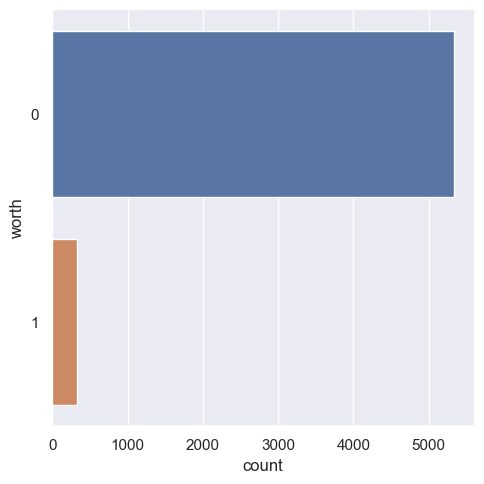

In [22]:
# distribution of response
sb.catplot(y = "worth", data = y_train, kind = "count")
plt.show()

**Classification Tree**

In [23]:
# import decisiontreeclassifier model
from sklearn.tree import DecisionTreeClassifier

# fit decision tree using train data
dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

**Prediction & Goodness of fit of model**

Goodness of fit of model 	Train Dataset
Classification Accuracy 	: 0.9696220416813847

Goodness of fit of model 	Test Dataset
Classification Accuracy 	: 0.965042372881356



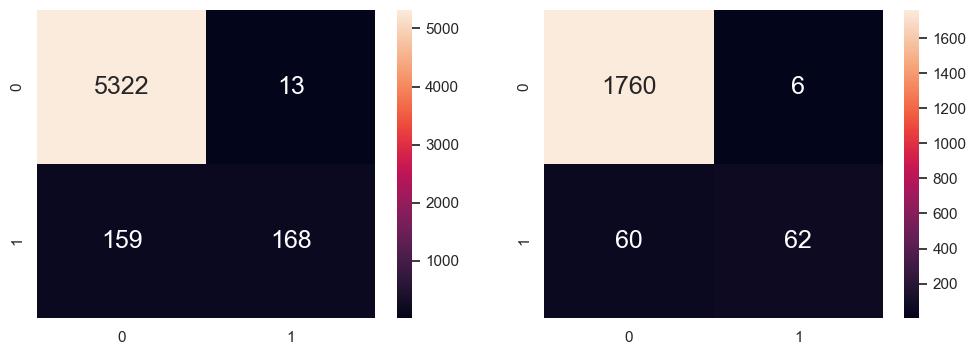

In [24]:
from sklearn.metrics import confusion_matrix

# predict response corresponding to predictors
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# goodness of fit (on train data)
print("Goodness of fit of model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

# goodness of fit (on test data)
print("Goodness of fit of model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()

# plot the confusion matrix for train and test
f, axes = plt.subplots(1, 2, figsize=(12,4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot=True,
          fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot=True,
          fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

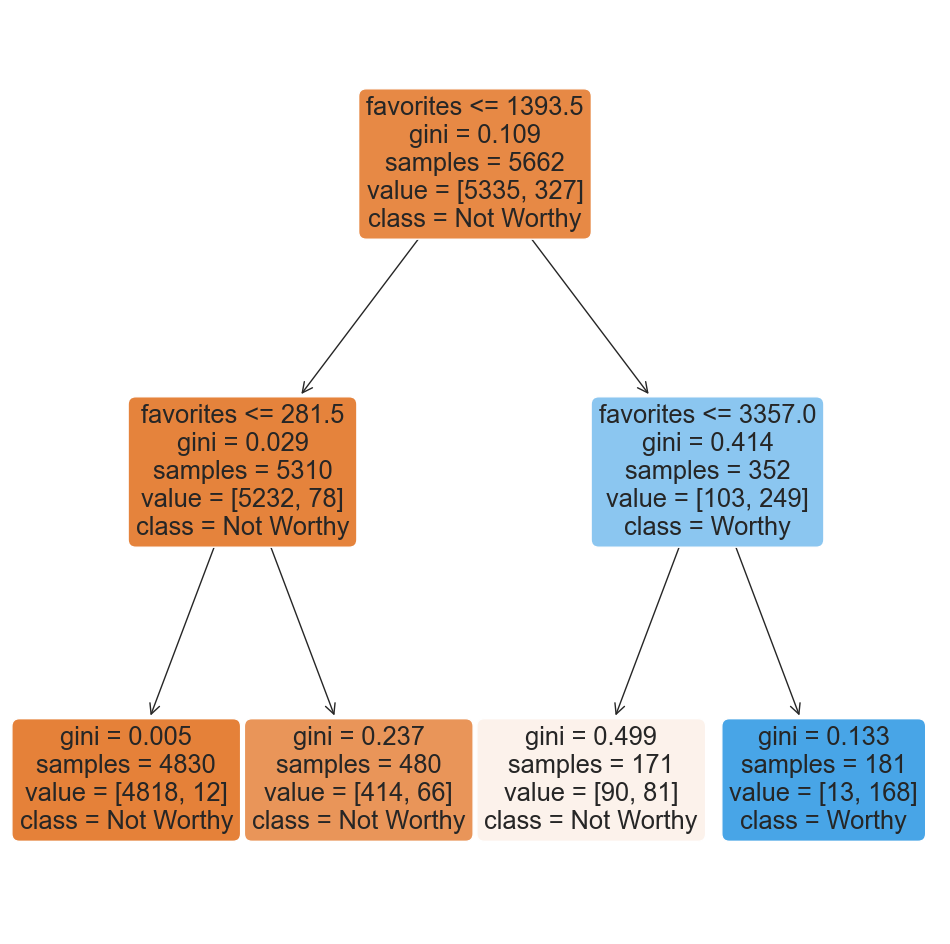

In [25]:
# plot trained decision tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True,
         feature_names=x_train.columns, 
          class_names=["Not Worthy","Worthy"])
plt.show()

**Conclusion/takeaways:**

Relatively high classification accuracy on both the train and test data sets.

True positive rate on train set: 192/(192+18) = 0.91429

True positive rate on test set: 57/(57+11) = 0.83824

Relatively high true positive rates on both the train and test data sets as well.

We now attempt to use another model to predict the same classifier - Random forest classifier

## Model 2: Random Forest Classifier
**Preface**

A random forest is comprised of combined decision trees. Each individual tree in the forest produces a class prediction. The class with the most votes becomes the model's overall prediction.
For example, if among 9 decision trees, 6 predict True, while the other three predict False, then the overall prediction is True.

"A large number of relatively uncorrelated trees operating as a committee will outperform any of the individual constituent models."; the low correlation between models is key. 

**Reference:**

https://towardsdatascience.com/understanding-random-forest-58381e0602d2

In [26]:
# create random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# response and predictors are the same

# split up the data into a train data set and a test data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
rf_model = RandomForestClassifier(n_estimators = 50, max_features = "auto")
rf_model.fit(x_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=50)

Goodness of fit of model 	Train Dataset
Classification Accuracy 	: 0.9982338396326387

Goodness of fit of model 	Test Dataset
Classification Accuracy 	: 0.965572033898305



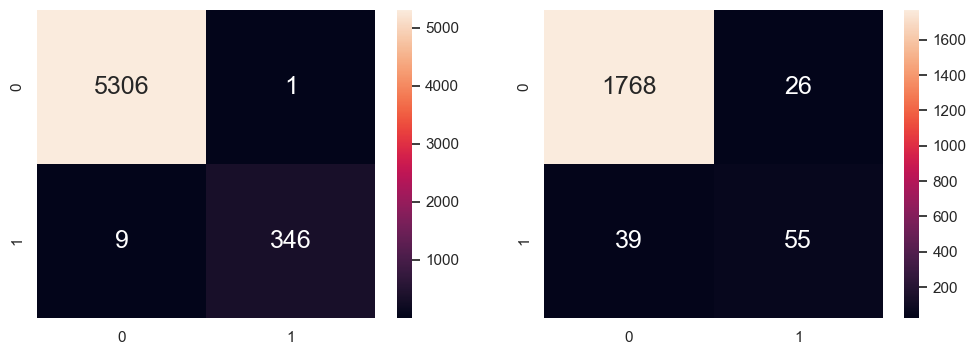

In [27]:
# predict response corresponding to predictors
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

# goodness of fit on train data
print("Goodness of fit of model \tTrain Dataset")
print("Classification Accuracy \t:", rf_model.score(x_train, y_train))
print()

# goodness of fit on test data
print("Goodness of fit of model \tTest Dataset")
print("Classification Accuracy \t:", rf_model.score(x_test, y_test))
print()

# plot confusion matrix for train and test
f, axes = plt.subplots(1, 2, figsize=(12,4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot=True,
          fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot=True,
          fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

True positive rates for random forest classifier model:

True positive rates in train dataset: 0.99712

True positive rates in test dataset: 0.67901

True positive rate is a lot worse in the test dataset as compared to in the train dataset. It also follows that classification accuracy for train set is very high, but accuracy for the test set is lower.

**Comparisons between models:**

Classification accuracy of random forest model is better than classification accuracy of decision tree model in terms of performance in train data set.

However, classification accuracy of random forest model is worse than decision tree model in test data set, which we believe holds more weight.

Therefore, we will go ahead and use the decision tree model, with its better classification accuracy on the test data set as well as higher true positive rate on the same set. It has the better performance as compared to the random forest model as tested above.